In [ ]:
import torch, os
import pandas as pd
from transformers import pipeline, BertForSequenceClassification, BertTokenizerFast
from torch.utils.data import Dataset

In [ ]:
from torch import cuda
device = 'cuda' if cuda.is_available() else 'cpu'
device

'cuda'

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
dataset_path = "/content/gdrive/MyDrive/categories_customer_service"

In [ ]:
train  = pd.read_csv(dataset_path + "/category_train.csv")

In [ ]:
train.head()

,Unnamed: 0,category,question
0,0,Icebreaker,tell me about yourself
1,1,Icebreaker,what do you like about working in customer ser...
2,2,Icebreaker,what things on your resume are you really an e...
3,3,Icebreaker,what do you know about our company or product
4,4,Icebreaker,why do you want to work here


In [ ]:
train["category"].unique()

array(['Icebreaker', 'Behavioral', 'Situational', 'Open-ended',
       'quality and culture', 'empythy and communication',
       'problem solving'], dtype=object)

In [ ]:
number_labels = len(train["category"].unique())

In [ ]:
number_labels = int(number_labels)

In [ ]:
number_labels

7

In [ ]:
train["question_word_count"] = train["question"].apply(lambda x : len(str(x).split()))

In [ ]:
train.head()

,Unnamed: 0,category,question,question_word_count
0,0,Icebreaker,tell me about yourself,4
1,1,Icebreaker,what do you like about working in customer ser...,15
2,2,Icebreaker,what things on your resume are you really an e...,11
3,3,Icebreaker,what do you know about our company or product,9
4,4,Icebreaker,why do you want to work here,7


In [ ]:
train["question_word_count"].max()

30

In [ ]:
max_len_training = train["question_word_count"].max()

In [ ]:
max_len_training

30

In [ ]:
train = train.drop(columns = ["Unnamed: 0"])


In [ ]:
train.head()

,category,question,question_word_count
0,Icebreaker,tell me about yourself,4
1,Icebreaker,what do you like about working in customer ser...,15
2,Icebreaker,what things on your resume are you really an e...,11
3,Icebreaker,what do you know about our company or product,9
4,Icebreaker,why do you want to work here,7


In [ ]:
labels = train["category"].unique().tolist()
labels

['Icebreaker',
 'Behavioral',
 'Situational',
 'Open-ended',
 'quality and culture',
 'empythy and communication',
 'problem solving']

In [ ]:
index_to_label = {id:label for id,label in enumerate(labels)}
index_to_label

{0: 'Icebreaker',
 1: 'Behavioral',
 2: 'Situational',
 3: 'Open-ended',
 4: 'quality and culture',
 5: 'empythy and communication',
 6: 'problem solving'}

In [ ]:
label_to_index = {label:id for id,label in enumerate(labels)}
label_to_index

{'Icebreaker': 0,
 'Behavioral': 1,
 'Situational': 2,
 'Open-ended': 3,
 'quality and culture': 4,
 'empythy and communication': 5,
 'problem solving': 6}

In [ ]:
train["labels"] = train["category"].apply(lambda x: label_to_index[x])

In [ ]:
train.head()

,category,question,question_word_count,labels
0,Icebreaker,tell me about yourself,4,0
1,Icebreaker,what do you like about working in customer ser...,15,0
2,Icebreaker,what things on your resume are you really an e...,11,0
3,Icebreaker,what do you know about our company or product,9,0
4,Icebreaker,why do you want to work here,7,0


In [ ]:
train.iloc[[40]]

,category,question,question_word_count,labels
40,quality and culture,how would you define customer delight,6,4


In [ ]:
train.iloc[[20]]

,category,question,question_word_count,labels
20,Situational,tell me about a time when you received poor cu...,16,2


<Axes: ylabel='category'>

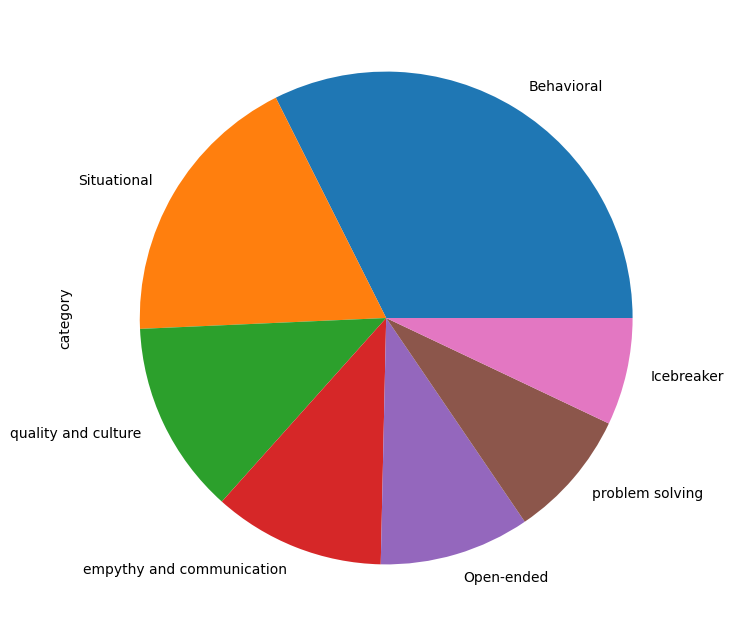

In [ ]:
train.category.value_counts().plot(kind="pie", figsize = (8,8))

In [ ]:
tokenizer = BertTokenizerFast.from_pretrained('bert-large-uncased', max_length = 30)

In [ ]:
model = BertForSequenceClassification.from_pretrained('bert-large-uncased', num_labels=number_labels, id2label = index_to_label, label2id = label_to_index )

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-large-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
model.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 1024, padding_idx=0)
      (position_embeddings): Embedding(512, 1024)
      (token_type_embeddings): Embedding(2, 1024)
      (LayerNorm): LayerNorm((1024,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-23): 24 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=1024, out_features=1024, bias=True)
              (key): Linear(in_features=1024, out_features=1024, bias=True)
              (value): Linear(in_features=1024, out_features=1024, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=1024, out_features=1024, bias=True)
              (LayerNorm): LayerNorm((1024,

In [ ]:
train_text = list(train.question)
train_labels = list(train.labels)

In [ ]:
train_text

['tell me about yourself',
 'what do you like about working in customer service and what do you not like',
 'what things on your resume are you really an expert in',
 'what do you know about our company or product',
 'why do you want to work here',
 'what skills do you possess that will help you excel in this role',
 'how well do you work under pressure',
 'how do you handle getting negative feedback from a customer',
 'what time management techniques do you use',
 'how do you prioritize your work',
 'how do you handle a disagreement with a teammate or manager',
 'how do you respond when you do not know the answer to a question',
 'how do you handle an angry customer',
 'tell me about a time when you had to deliver bad news to a customer',
 'describe a time when you worked on a team projectwhat was your role and what would you have done differently',
 'how would you handle a situation where you have to reach out to the customer about an issue without having all the information or answe

In [ ]:
train_labels

[0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [ ]:
len(train_text), len(train_labels)

(71, 71)

In [ ]:
train_embedding = tokenizer(train_text, truncation = True , padding = True)

In [ ]:
train_embedding

{'input_ids': [[101, 2425, 2033, 2055, 4426, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 2054, 2079, 2017, 2066, 2055, 2551, 1999, 8013, 2326, 1998, 2054, 2079, 2017, 2025, 2066, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 2054, 2477, 2006, 2115, 13746, 2024, 2017, 2428, 2019, 6739, 1999, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 2054, 2079, 2017, 2113, 2055, 2256, 2194, 2030, 4031, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 2339, 2079, 2017, 2215, 2000, 2147, 2182, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 2054, 4813, 2079, 2017, 10295, 2008, 2097, 2393, 2017, 24970, 1999, 2023, 2535, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 2129, 2092, 2079, 2017, 2147, 2104, 3778, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 2129, 2079, 2017, 5047, 2893, 4997, 12247, 

In [ ]:
for key , val in train_embedding.items():
  print(f"{key}======{val}")

input_ids======[[101, 2425, 2033, 2055, 4426, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 2054, 2079, 2017, 2066, 2055, 2551, 1999, 8013, 2326, 1998, 2054, 2079, 2017, 2025, 2066, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 2054, 2477, 2006, 2115, 13746, 2024, 2017, 2428, 2019, 6739, 1999, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 2054, 2079, 2017, 2113, 2055, 2256, 2194, 2030, 4031, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 2339, 2079, 2017, 2215, 2000, 2147, 2182, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 2054, 4813, 2079, 2017, 10295, 2008, 2097, 2393, 2017, 24970, 1999, 2023, 2535, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 2129, 2092, 2079, 2017, 2147, 2104, 3778, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 2129, 2079, 2017, 5047, 2893, 4997, 12247,

In [ ]:
class DataLoader(Dataset):


  def __init__(self, encodings , labels):

    self.encodings = encodings
    self.labels = labels

  def __getitem__(self, idx):


    item = {key: torch.tensor(val[idx])  for key, val in self.encodings.items()}

    item["labels"] = self.labels[idx]

    return item

  def __len__(self):


    return len(self.labels)



In [ ]:
train_dataloader = DataLoader(train_embedding, train_labels)

In [ ]:
for i in train_dataloader:

  print(i)

{'input_ids': tensor([ 101, 2425, 2033, 2055, 4426,  102,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0]), 'token_type_ids': tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0]), 'attention_mask': tensor([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0]), 'labels': 0}
{'input_ids': tensor([ 101, 2054, 2079, 2017, 2066, 2055, 2551, 1999, 8013, 2326, 1998, 2054,
        2079, 2017, 2025, 2066,  102,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0]), 'token_type_ids': tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0]), 'attention_mask': tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
        

In [ ]:
from transformers import TrainingArguments, Trainer


In [ ]:
from sklearn.metrics import accuracy_score , precision_recall_fscore_support

In [ ]:
def compute_metrics(pred):


  labels = pred.label_ids

  preds = pred.predictions.argmax(-1)

  precision , recall , F1 , _ = precision_recall_fscore_support(labels, preds , average ="macro")

  accuracy = accuracy_score(labels, preds)

  return{
      "accuracy" : accuracy,

      "F1" : F1,

      "precision" : precision,

      "recall" : recall


  }

In [ ]:
#!pip install transformers[torch]

In [ ]:
#!pip install accelerate -U

In [ ]:
training_args = TrainingArguments(
    # The output directory where the model predictions and checkpoints will be written
    output_dir='/content/gdrive/MyDrive/categories_customer_service',
    do_train=True,
    do_eval=True,
    #  The number of epochs, defaults to 3.0
    num_train_epochs=100,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=32,
    # Number of steps used for a linear warmup
    warmup_steps=100,
    weight_decay=0.01,
    logging_strategy='steps',
   # TensorBoard log directory
    logging_dir='./fourth_multi-class-logs',
    logging_steps=50,
    evaluation_strategy="steps",
    eval_steps=50,
    save_strategy="steps",
    fp16=True,
    load_best_model_at_end=True
)

In [ ]:
trainer = Trainer(
    model = model,
    args = training_args,
    train_dataset = train_dataloader,
    eval_dataset = train_dataloader,

    compute_metrics = compute_metrics
)

In [ ]:
trainer.train()

Step,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
50,1.674400,0.862219,0.704225,0.571365,0.743590,0.604657
100,0.446700,0.163460,0.943662,0.902597,0.956044,0.904762
150,0.034300,0.002171,1.000000,1.000000,1.000000,1.000000
200,0.001700,0.000895,1.000000,1.000000,1.000000,1.000000
250,0.001100,0.000647,1.000000,1.000000,1.000000,1.000000
300,0.000800,0.000523,1.000000,1.000000,1.000000,1.000000
350,0.000700,0.000448,1.000000,1.000000,1.000000,1.000000
400,0.000600,0.000404,1.000000,1.000000,1.000000,1.000000
450,0.000600,0.000380,1.000000,1.000000,1.000000,1.000000
500,0.000500,0.000370,1.000000,1.000000,1.000000,1.000000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


TrainOutput(global_step=500, training_loss=0.216141629409045, metrics={'train_runtime': 167.8908, 'train_samples_per_second': 42.289, 'train_steps_per_second': 2.978, 'total_flos': 426475014154200.0, 'train_loss': 0.216141629409045, 'epoch': 100.0})

In [ ]:
def predict(text):


  inputs  = tokenizer(text, padding= True , truncation = True , max_length = 30, return_tensors="pt" ).to("cuda")

  outputs = model(**inputs)

  probs = outputs[0].softmax(1)

  pred_label_index = probs.argmax()

  pred_label = model.config.id2label[pred_label_index.item()]

  return pred_label

In [ ]:
train["question"][0]

'tell me about yourself'

In [ ]:
train["category"][0]

'Icebreaker'

In [ ]:
train_text = "tell me about yourself"

predict(train_text)

'Icebreaker'

In [ ]:
train["question"][50]

'have you ever been in a situation where you were unsure how to assist a customer what steps did you take to find the right solution to their problem'

In [ ]:
train["category"][50]

'problem solving'

In [ ]:
train_text = "have you ever been in a situation where you were unsure how to assist a customer what steps did you take to find the right solution to their problem"

predict(train_text)

'problem solving'

In [ ]:

test = pd.read_csv(dataset_path +"/all_category_data.csv")

In [ ]:
test.head()

,Unnamed: 0,category,question
0,0,Icebreaker,tell me about yourself
1,1,Icebreaker,what do you like about working in customer ser...
2,2,Icebreaker,what things on your resume are you really an e...
3,3,Icebreaker,what do you know about our company or product
4,4,Icebreaker,why do you want to work here


In [ ]:
questionz = test["question"].tolist()

In [ ]:
len(test), len(questionz)

(254, 254)

In [ ]:
categories = []

for question in questionz:

  pred = predict(question)
  categories.append(pred)

In [ ]:
print(len(categories))

254


In [ ]:
test.insert(3, "categories", categories)

In [ ]:
test.head()

,Unnamed: 0,category,question,categories
0,0,Icebreaker,tell me about yourself,Icebreaker
1,1,Icebreaker,what do you like about working in customer ser...,Icebreaker
2,2,Icebreaker,what things on your resume are you really an e...,Icebreaker
3,3,Icebreaker,what do you know about our company or product,Icebreaker
4,4,Icebreaker,why do you want to work here,Icebreaker


<Axes: ylabel='category'>

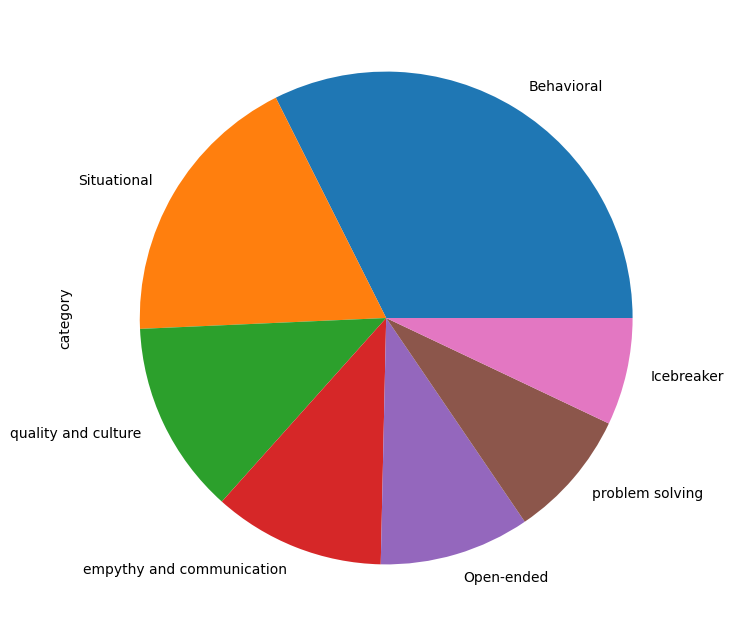

In [ ]:
test.category.value_counts().plot(kind="pie", figsize = (8,8))

<Axes: ylabel='categories'>

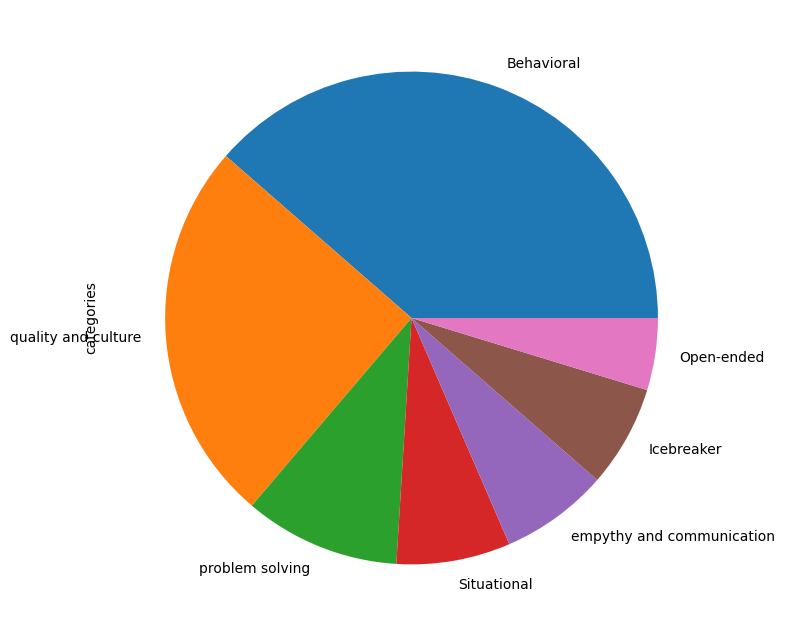

In [ ]:
test.categories.value_counts().plot(kind="pie", figsize = (8,8))

In [ ]:
model_path = '/content/gdrive/MyDrive/customer_service_model_output'

In [ ]:
trainer.save_model(model_path)
tokenizer.save_pretrained(model_path)

('/content/gdrive/MyDrive/customer_service_model_output/tokenizer_config.json',
 '/content/gdrive/MyDrive/customer_service_model_output/special_tokens_map.json',
 '/content/gdrive/MyDrive/customer_service_model_output/vocab.txt',
 '/content/gdrive/MyDrive/customer_service_model_output/added_tokens.json',
 '/content/gdrive/MyDrive/customer_service_model_output/tokenizer.json')

In [ ]:
test = test.drop(columns = ["category", "Unnamed: 0"])

In [ ]:
test = test.rename(columns ={"categories":"category"})

In [ ]:
test.head()

,question,category
0,tell me about yourself,Icebreaker
1,what do you like about working in customer ser...,Icebreaker
2,what things on your resume are you really an e...,Icebreaker
3,what do you know about our company or product,Icebreaker
4,why do you want to work here,Icebreaker


In [ ]:
test.to_csv(dataset_path+"/fourth_final_categories.csv")